<a href="https://colab.research.google.com/github/Mfys212/Transformer/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone Repository

In [ ]:
!git clone https://github.com/Mfys212/Transformer
!pip install -U -r /content/Transformer/requirements.txt

Cloning into 'Transformer'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 166 (delta 71), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (166/166), 117.20 KiB | 944.00 KiB/s, done.
Resolving deltas: 100% (71/71), done.
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=77171abbeb5ea65254fa33fdfe97319e5e9b3342854c8d5a3dbecd15e488fa05
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


# Create dataset from pandas dataframe

Input data harus dalam bentuk dataframe pandas dengan kolom pertama sebagai kalimat yang akan diterjemahkan atau pertanyaan.

In [1]:
!wget https://raw.githubusercontent.com/sains-data/HivMate/refs/heads/main/data/datasetDL.json

--2024-12-09 08:32:00--  https://raw.githubusercontent.com/sains-data/HivMate/refs/heads/main/data/datasetDL.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34332 (34K) [text/plain]
Saving to: ‘datasetDL.json’

datasetDL.json      100%[===================>]  33.53K  --.-KB/s    in 0.001s  

2024-12-09 08:32:00 (47.3 MB/s) - ‘datasetDL.json’ saved [34332/34332]



In [2]:
import pandas as pd
import json

with open('/content/datasetDL.json', 'r') as file:
    data_json = json.load(file)

data_rows = []
for intent in data_json["intents"]:
    for text_item, response_item in zip(intent["text"], intent["responses"]):
        data_rows.append({
            "text": text_item,
            "response": response_item
        })

df = pd.DataFrame(data_rows)
train, valid = df, df
train

,text,response
0,Apa itu HIV?,"Singkatan dari Human Immunodeficiency Virus, s..."
1,Apa itu AIDS?,Singkatan dari Acquired Immune Deficiency Synd...
2,Apa perbedaan antara HIV dan AIDS?,"HIV adalah virus penyebab, sedangkan AIDS adal..."
3,Apa itu infeksi oportunistik?,Infeksi oportunistik dapat disebabkan oleh ber...
4,Berapa lama waktu yang biasanya dibutuhkan unt...,Biasanya membutuhkan waktu 5 hingga 10 tahun a...
...,...,...
95,Apa potensi terapi gen dalam pengobatan HIV?,Terapi gen memiliki potensi untuk menyembuhkan...
96,Bagaimana kecerdasan buatan digunakan untuk me...,Kecerdasan buatan digunakan untuk menganalisis...
97,Bagaimana teknologi blockchain dapat membantu ...,Teknologi blockchain dapat meningkatkan manaje...
98,Apa inovasi terbaru dalam alat uji HIV berbasi...,Inovasi dalam alat uji HIV berbasis rumah menc...


# Define Hyperparameters

In [ ]:
from Transformer.train.train import TRANSFORMER

BATCH_SIZE = 8        #batch size
SEQ_LENGTH = 40       #max sequence
VOCAB_SIZE = 1500     #vocab size
EMBED_DIM = 512       #embedding dimension
EPOCHS = 40           #num epochs
num_head = 8          #num heads in multiheads attention
num_l = 2             #num layer encoder and decoder block

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Train

In [ ]:
model, train_data, valid_data = TRANSFORMER(
    train, valid, batch=BATCH_SIZE, num_head=num_head, num_l=num_l, EMBED_DIM=EMBED_DIM, SEQ_LENGTH=SEQ_LENGTH, VOCAB_SIZE=VOCAB_SIZE)

history = model.fit(train_data, epochs=EPOCHS, validation_data=valid_data)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - seq_acc: 0.0011 - seq_loss: 7.3095 - val_seq_acc: 0.0014 - val_seq_loss: 7.2861
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - seq_acc: 0.0023 - seq_loss: 7.2771 - val_seq_acc: 0.0019 - val_seq_loss: 7.2286
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - seq_acc: 0.0014 - seq_loss: 7.2254 - val_seq_acc: 0.0026 - val_seq_loss: 7.1343
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - seq_acc: 0.0017 - seq_loss: 7.1089 - val_seq_acc: 0.0050 - val_seq_loss: 7.0069
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - seq_acc: 0.0073 - seq_loss: 6.9843 - val_seq_acc: 0.0216 - val_seq_loss: 6.8545
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - seq_acc: 0.0246 - seq_loss: 6.8146 - val_seq_acc: 0.0423 - val_seq_loss: 6.6897
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - seq_acc: 0.0400 - seq_loss: 6.6595 - val_seq_acc: 0.0492 - val_seq_loss: 6.5356
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - seq_acc: 0.045

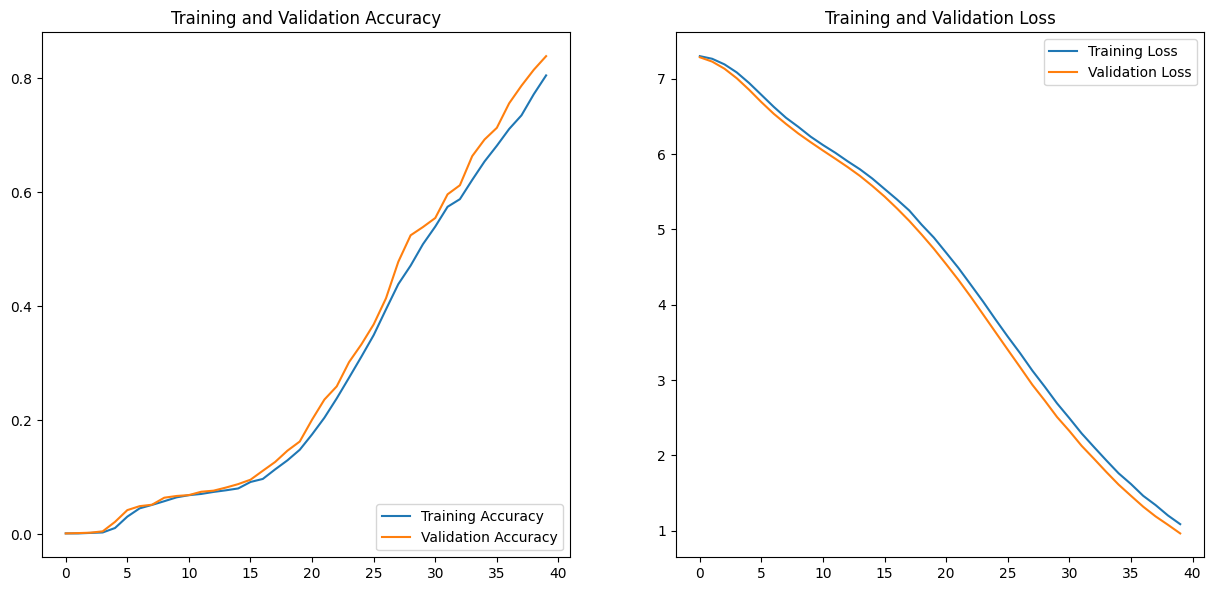

In [ ]:
import matplotlib.pyplot as plt
epochs_range = range(EPOCHS)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history.history['seq_acc'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_seq_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history.history['seq_loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_seq_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Eval

In [ ]:
model.evaluate(valid_data) # acc and loss with input gorund truth in decoder

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - seq_acc: 0.8731 - seq_loss: 0.8681


[0.8389826416969299, 0.9622783660888672]

In [ ]:
model.eval_metrics(valid) # without input gorund truth in decoder

Processing predictions: 100%|██████████| 100/100 [04:22<00:00,  2.62s/it]
Calculate metrics: 100it [00:26,  3.82it/s]


{'BLEU': 0.003904463507443407,
 'ROUGE-1': 0.001,
 'ROUGE-2': 0.0002,
 'ROUGE-L': 0.001,
 'METEOR': 0.05435269473837338}

# Predict

In [ ]:
import tensorflow as tf

def chat():
    print("balas exit untuk keluar program")
    prompt = input("Anda: ")
    while prompt != "exit":
        print("Bot: " + model(tf.constant(prompt)))
        prompt = input("Anda: ")
chat()

balas exit untuk keluar program
Anda: apa itu penyakit hiv?
Bot: singkatan dari human immunodeficiency virus, sebuah virus yang menyerang sistem kekebalan tubuh manusia.  singkatan dari infeksi hiv.  singkatan dari infeksi yang terinfeksi. sistem kekebalan tubuh.  singkatan dari infeksi dan penyakit lainnya, yang menyulitkan tubuh untuk membasmi
Anda: apa bedanya hiv dan aids?
Bot: hiv adalah virus penyebab, sedangkan aids adalah tahap akhir dari infeksi yang ditandai dengan hiv, yang dapat masuk ke dalam memprediksi jalannya infeksi dan menyesuaikan pengobatan secara personal.  hiv untuk sistem kekebalan tubuh.   hiv.  sel
Anda: pasien hiv
Bot: pasien hiv dapat menyebar melalui hubungan seksual dari ibu ke layanan kesehatan, dengan pendekatan berbasis sains dan meningkatkan risiko penularan ke layanan kesehatan, terutama bagi odha dapat memasuki sel.  hiv untuk sistem kekebalan tubuh.  teknologi layanan kesehatan
Anda: pengobatan hiv
Bot: hiv dapat menyebar melalui hubungan seksual da